In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Classification Algorithm : to predict the value of yes /no means use for
#Binary classification and multiclass classify
#1. Logistic Regression
#Work on insurance dataset

In [3]:
#TO load dataset
df=pd.read_csv("insurance.csv")
#To show first 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

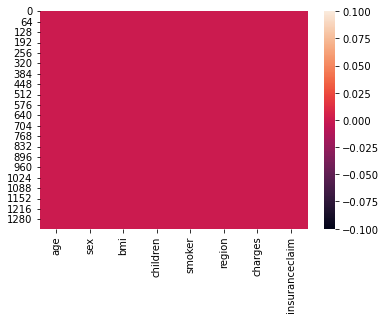

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
X=df.drop("insuranceclaim",axis=1)#select input features from dataset
Y=df["insuranceclaim"]#select target means output variable

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#Creating object of tain_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [11]:
#Apply Scalling on 70% input Training data and 30% input Testing data
from sklearn.preprocessing import StandardScaler
#create object of StandardScalar
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
#Apply ligistic Regression
#call LgisticRegression class
from sklearn.linear_model import LogisticRegression

In [13]:
#Create object of logisticRegression()
lr=LogisticRegression()

In [14]:
#Train the model with 70% data , use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [15]:
#Test the model with 30% data , ML gives predicted output 
Y_pred=lr.predict(X_test)#Y_perd=1/(1+e^(-x))

In [16]:
#Y_test : Actual o/p
#Y_pred : predicted o/p
dic={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dic)
df1.head(10)

,Actual Output,Predicted Output
559,1,1
1087,1,1
1020,1,1
460,0,0
802,0,0
298,1,1
481,1,1
616,1,1
763,1,0
750,1,1


In [17]:
#Check Score: -
#score() inbuilt method of logisticRegression class
lr.score(X_test,Y_test)#score always 0-1


0.8805970149253731

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.91      0.89      0.90       245

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



In [20]:
#Confusion Matrix: -
#confusion_matrix() inbuilt function , call class
from sklearn.metrics import confusion_matrix

In [21]:
print(confusion_matrix(Y_test,Y_pred))

[[136  21]
 [ 27 218]]


In [22]:
#Convert 2D array into 1D array : use ravel()
TP,FP,FN,TN=confusion_matrix(Y_test,Y_pred).ravel()#flatten()
print("True Positive : ",TP)
print("True Negative : ",TN)
print("False Negative : ",FN)
print("False Positive : ",FP)

True Positive :  136
True Negative :  218
False Negative :  27
False Positive :  21


In [23]:
#Data Analysis on insurance.csv dataset manually with the help of visualisation
#work on feature selection 
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [25]:
#we have input featutres : categorical data means categorical columns
#(object type) : sex ,children,smoker, and region  : apply countplot() 
#for data analysis (countplot means frequency graph)

#and Numerical columns : age,bmi,charges apply scatterplot()

1    783
0    555
Name: insuranceclaim, dtype: int64


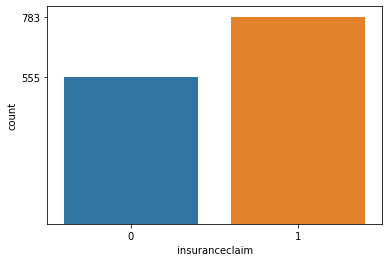

In [26]:
#First : how many customer to claim the insurance  and do not claim the insurance

f=df["insuranceclaim"].value_counts()
print(f)
#Visualisation
sns.countplot(data=df,x="insuranceclaim")
plt.yticks(f)
plt.show()

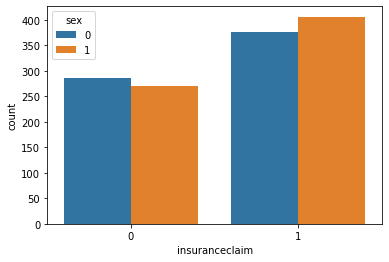

In [27]:
#Check Is input feature : sex is important to predict output
#Here sex : categorical type and target : also categorical
sns.countplot(data=df,x="insuranceclaim",hue="sex")#always given in hue =input
plt.show()

In [28]:
#we conclude : sex is not impotant to predict the o/p

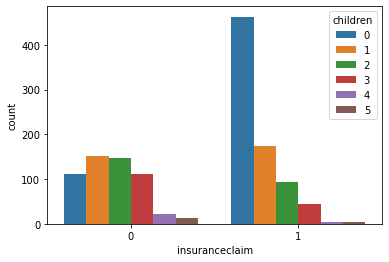

In [29]:
#Take next column children with insuraceclaim 
sns.countplot(data=df,x="insuranceclaim" ,hue="children")
plt.show()

In [30]:
#we conclude : children is important to predict o/p

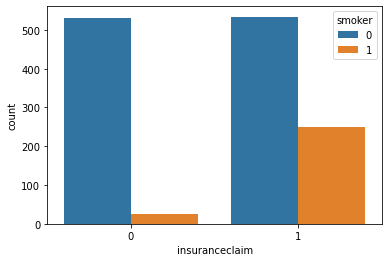

In [31]:
#Take next column smoker with insuraceclaim 
sns.countplot(data=df,x="insuranceclaim" ,hue="smoker")
plt.show()

In [32]:
 #we conclude : smoker is important to predict o/p

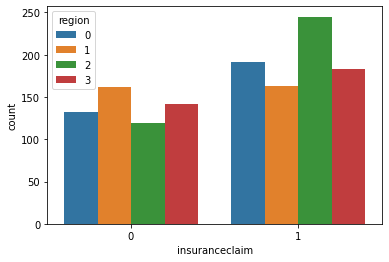

In [33]:
#Take next column region with insuraceclaim 
sns.countplot(data=df,x="insuranceclaim" ,hue="region")
plt.show()

In [34]:
#we conclude : region is not impotant to predict the o/p

In [35]:
#We are seeing with Numerical columns : age,bmi,charges apply scatterplot()
#Check Is input feature : age is important to predict output
#Here age : continuous Numerical type and target : also categorical

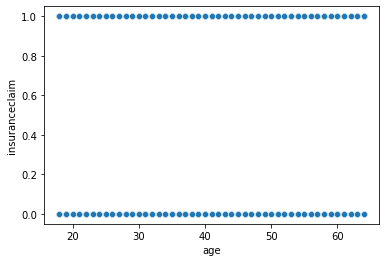

In [36]:
sns.scatterplot(data=df,x="age",y="insuranceclaim")
#here X is input
plt.show()

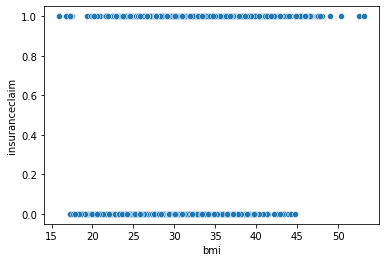

In [37]:
sns.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()

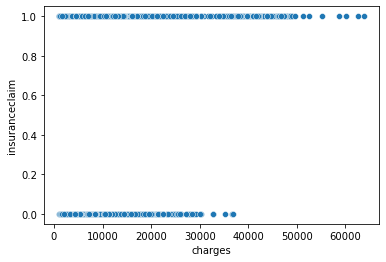

In [38]:
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

In [39]:
#we concluded : bmi and chargers are imp to predict the o/p

#We concluded after preprocessing the dataset: 
#imp features bmi,charges,smoker,children with target means output
#=insuranceclaim

X=df[["bmi","charges","children","smoker"]]
Y=df["insuranceclaim"]

# Decision Tree

In [40]:
#Use Classification Algorithm : DecisionTreeClassifier
#First load dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [41]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [42]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [43]:
X=df.drop("insuranceclaim",axis=1)#select input features from dataset
Y=df["insuranceclaim"]#select target means output variable

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [45]:
from sklearn.preprocessing import StandardScaler
#create object of StandardScalar
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

#Scaling is only use on input data

In [46]:
#Perform dataset with the help of DecisionTreeClassifier
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [47]:
#Create the object
dt=DecisionTreeClassifier() #by default use gini index : 1-P^2-Q^2

In [48]:
#Train the model
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
#Testing the model
Y_pred=dt.predict(X_test)

In [50]:
#print classification_report()
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [51]:
#print Confusion matrix
print(confusion_matrix(Y_test,Y_pred))

[[154   3]
 [  3 242]]


In [54]:
#To show Information gain of each input
IG=dt.feature_importances_
print(IG)

[0.0701922  0.         0.4259328  0.32951284 0.16581384 0.
 0.00854832]


In [53]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
dic={'Input Columns':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1

,Input Columns,Information_Gain
0,age,0.070192
1,sex,0.000000
2,bmi,0.425933
3,children,0.329513
4,smoker,0.165814
5,region,0.000000
6,charges,0.008548


In [60]:
df1.sort_values('Information_Gain',ascending=False)
#to arrange records in descending order according to Information_Gain column

,Input Columns,Information_Gain
2,bmi,0.425933
3,children,0.329513
4,smoker,0.165814
0,age,0.070192
6,charges,0.008548
1,sex,0.000000
5,region,0.000000


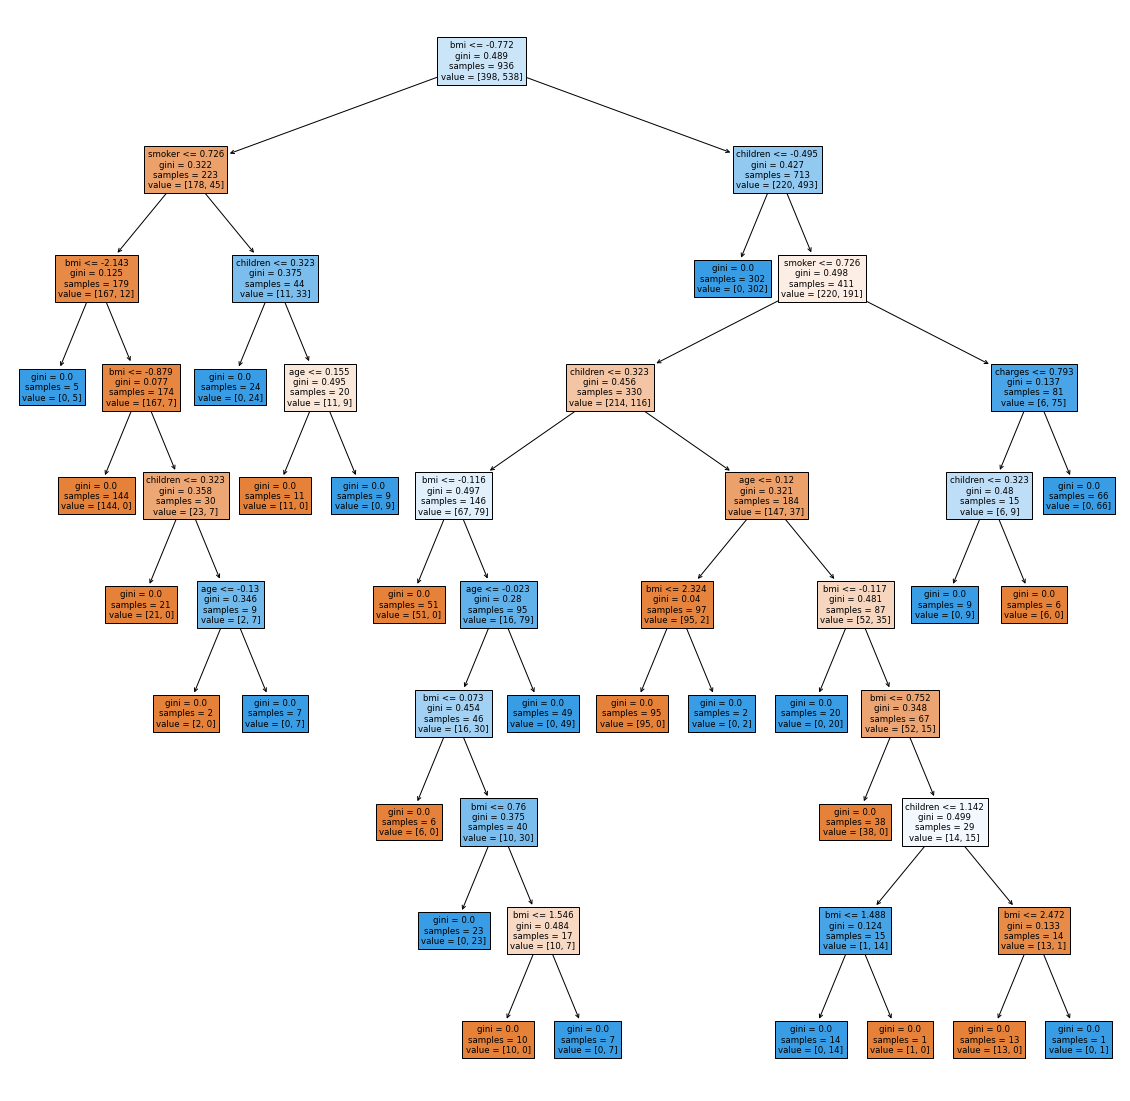

In [61]:
#create a tree
from sklearn import tree
features=X.columns #here features user defined object which hold all input
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)